# Κατηγοριοποίηση εικόνων με Νευρωνικά Δίκτυα
### Χρήστος Δίου & Αριστοτέλης Μπάλλας

Στο notebook αυτό καλείστε να ορίσετε απλά μοντέλα νευρωνικών δικτύων για την κατηγοριοποίηση εικόνων στο σύνολο δεδομένων CIFAR-10. Θα πρέπει να συμπληρώσετε τα κελιά που ανιτστοιχούν στο ορισμό, εκπαίδευση και αξιολόγησης των μοντέλων που αναφέρονται στην εκφώνηση της εργασίας σας.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.datasets
import matplotlib.pyplot as plt
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.losses import CategoricalCrossentropy

## Πειράματα στο CIFAR-10

Το CIFAR-10 είναι ένα σύνολο μικρών εικόνων που ανήκουν σε μία από 10 κατηγορίες. Για λεπτομέρειες δείτε το site του dataset:

https://www.cs.toronto.edu/~kriz/cifar.html

Θα το επεξεργαστούμε με τρόπο παρόμοιο με το MNIST, όπως είδαμε στα σχετικά notebooks του μαθήματος. Η διαφορά εδώ είναι ότι το πρόβλημα είναι αρκετά πιο σύνθετο, μιας και έχουμε φυσικά αντικείμενα αντί για χειρόγραφους χαρακτήρες.

"Κατέβασμα" του dataset, φόρτωση στη μνήμη, αλλαγή τύπου δεδομένων και μετασχηματισμός στο [0, 1].

In [2]:
((x_train, y_train), (x_test, y_test)) = keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

170498071/170498071 [==============================] - 19s 0us/step


**Τα** δεδομένα εκπαίδευσης περιλαμβάνουν 50000 έγχρωμες (3 κανάλια) εικόνες των 32x32 pixel.

In [3]:
print(x_train.shape)
print(y_train.shape)


(50000, 32, 32, 3)
(50000, 1)


Για παράδειγμα, η 2η εικόνα του συνόλου εκπαίδευσης:

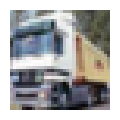

In [4]:
fig = plt.figure(figsize=(1, 1))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
plt.imshow(x_train[1], interpolation="none")

Τα δεδομένα μας χωρίζονται σε 10 κλάσεις:

In [5]:
print(y_train[10])
print(np.unique(y_train))

[4]
[0 1 2 3 4 5 6 7 8 9]


Προσπαθήστε να λύσετε το πρόβλημα της κατηγοριοποίησης εικόνων με ένα πλήρως διασυνδεδεμένο νευρωνικό δίκτυο, με 2 κρυφά layers των 20 νευρώνων το καθένα. Για ένα τέτοιο μοντέλο θα πρέπει να μετασχηματίσουμε την είσοδο και την έξοδο. Η είσοδος θα πρέπει να είναι ένα μεγάλο διάνυσμα (αντί για εικόνα), ενώ η έξοδος ένα one-hot vector των 10 στοιχείων:

In [6]:
x_train_fc = x_train.reshape((x_train.shape[0], x_train[0].shape[0] * x_train[0].shape[1] * x_train[0].shape[2]))
y_train_fc = keras.utils.to_categorical(y_train, num_classes=10)

Έπειτα θα πρέπει να οριστεί το μοντέλο μας:

## Στα παρακάτω κελιά εκπαιδεύστε ένα πλήρως διασυνδεδεμένο νευρωνικό δίκτυο με:
* 2 κρυφά επίπεδα των 20 νευρώνων το καθένα με συνάρτηση ενεργοποίησης ReLU
* 1 τελικό πλήρες διασυνδεδεμένο επίπεδο, με κατάλληλη συνάρτηση ενεργοποίησης
* SGD optimizer με ρυθμό εκμάθησης 0.001 και κατάλληλο loss function
* 20 εποχές εκπαίδευσης με batch size 50 δείγματα

Χρησιμοποιήστε την ```model.summary()``` για να βεβαιωθείτε για την αρχιτεκτονική και να δείτε τις παραμέτρους του μοντέλου.

In [7]:
# Case 1: Fully connected model

###### DEFINE MODEL HERE ######
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(x_train_fc.shape[1],)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

**Ερώτηση:** Πως προκύπτει ο αριθμός των παραμέτρων του κάθε επιπέδου;



In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                61460     
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 62090 (242.54 KB)
Trainable params: 62090 (242.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Ορίζουμε παρακάτω τις παραμέτρους εκπαίδευσης του μοντέλου με την μέθοδο ```compile()``` και το εκπαιδεύουμε με την μέθοδο ```fit()```.

In [9]:
###### COMPILE MODEL HERE ( .compile() )######
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

###### TRAIN MODEL HERE ( .fit() ) ######
history = model.fit(x_train_fc, y_train_fc, epochs=20, batch_size=50)

Epoch 1/20
1000/1000 [==============================] - 6s 4ms/step - loss: 2.2441 - accuracy: 0.1597
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.1523 - accuracy: 0.2203
Epoch 3/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.0596 - accuracy: 0.2508
Epoch 4/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.9906 - accuracy: 0.2854
Epoch 5/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.9434 - accuracy: 0.3088
Epoch 6/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.9099 - accuracy: 0.3245
Epoch 7/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.8836 - accuracy: 0.3336
Epoch 8/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.8627 - accuracy: 0.3397
Epoch 9/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.8449 - accuracy: 0.3471
Epoch 10/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.829

# Μετασχηματίζουμε τα δεδομένα δοκιμής

In [10]:
x_test_fc = x_test.reshape((x_test.shape[0], x_test[0].shape[0] * x_test[0].shape[1] * x_test[0].shape[2]))
y_test_fc = keras.utils.to_categorical(y_test, num_classes=10)
print(y_test_fc[0])
print(x_test_fc[0].shape)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
(3072,)


και αξιολογούμε το μοντέλο μας:

In [11]:
###### EVALUATE MODEL HERE ( .evaluate() ) ######
loss, accuracy = model.evaluate(x_test_fc, y_test_fc)
print("Accuracy: ", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 1.7298 - accuracy: 0.3865
Accuracy:  0.3865000009536743


## Στα παρακάτω κελιά εκπαιδεύστε ένα συνελικτικό νευρωνικό δίκτυο με:
* 2 συνελικτικά επίπεδα των 16 και 32 φίλτρων με συνάρτηση ενεργοποίησης RelU
* 2 ενδιάμεσα επίπεδα συγκέντρωσης
* 1 επίπεδο Flatten
* 1 τελικό πλήρες διασυνδεδεμένο επίπεδο, με κατάλληλη συνάρτηση ενεργοποίησης
* Adam optimizer με ρυθμό εκμάθησης 0.001 και κατάλληλο loss function
* 20 εποχές εκπαίδευσης με batch size 50 δείγματα

Για τα επίπεδα συγκέντρωσης χρησιμοποιήστε επίπεδα ```MaxPooling2D()```.

Χρησιμοποιήστε την ```model.summary()``` για να βεβαιωθείτε για την αρχιτεκτονική και να δείτε τις παραμέτρους του μοντέλου.

In [12]:
# Case 2: Convolutional Neural Network

###### DEFINE MODEL HERE ######

model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])


**Ερώτηση:** Σ' αυτή την περίπτωση, πως προκύπτει ο αριθμός των παραμέτρων;

In [13]:
model_cnn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense_3 (Dense)             (None, 10)               

Εκπαιδεύουμε το μοντέλο μας. Προσοχή, εδώ η είσοδος στην μέθοδο ```.fit()``` είναι οι εικόνες (x_train) και όχι τα διανύσματα (x_train_fc).

In [14]:
###### COMPILE MODEL HERE ( .compile() )######
model_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

###### TRAIN MODEL HERE ( .fit() ) ######
history_cnn = model_cnn.fit(x_train, y_train_fc, epochs=20, batch_size=50, validation_data=(x_test, y_test_fc))



Epoch 1/20
1000/1000 [==============================] - 9s 6ms/step - loss: 1.6078 - accuracy: 0.4249 - val_loss: 1.3573 - val_accuracy: 0.5210
Epoch 2/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.2981 - accuracy: 0.5434 - val_loss: 1.2291 - val_accuracy: 0.5712
Epoch 3/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.1789 - accuracy: 0.5875 - val_loss: 1.1325 - val_accuracy: 0.6069
Epoch 4/20
1000/1000 [==============================] - 5s 5ms/step - loss: 1.1076 - accuracy: 0.6161 - val_loss: 1.0970 - val_accuracy: 0.6156
Epoch 5/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.0569 - accuracy: 0.6338 - val_loss: 1.0766 - val_accuracy: 0.6308
Epoch 6/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.0232 - accuracy: 0.6474 - val_loss: 1.0654 - val_accuracy: 0.6309
Epoch 7/20
1000/1000 [==============================] - 5s 5ms/step - loss: 0.9893 - accuracy: 0.6588 - val_loss: 1.0270 - val_accuracy:

... και αξιολογούμε στα δεδομένα (x_test, y_test_fc)

In [15]:
y_test_fc = keras.utils.to_categorical(y_test, num_classes=10)

In [16]:
###### EVALUATE MODEL HERE ( .evaluate() ) ######
evaluation_cnn = model_cnn.evaluate(x_test, y_test_fc)

313/313 [==============================] - 1s 3ms/step - loss: 0.9960 - accuracy: 0.6623


313/313 - 1s - loss: 0.9960 - accuracy: 0.6623 - 687ms/epoch - 2ms/step


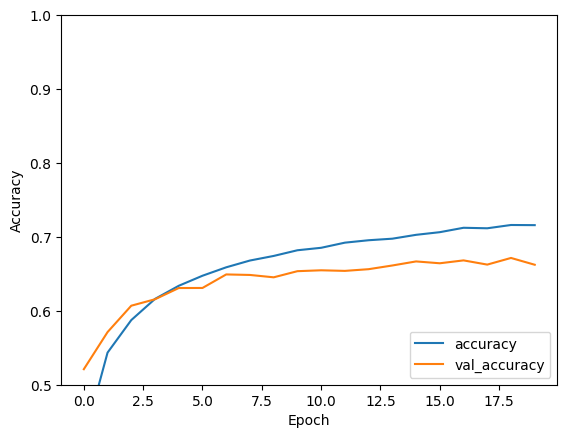

In [17]:
plt.plot(history_cnn.history['accuracy'], label='accuracy')
plt.plot(history_cnn.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_cnn.evaluate(x_test, y_test_fc, verbose=2)

**Ερώτηση:** Τι παρατηρείτε σχετικά με τον αριθμό παραμέτρων και την επίδοση του κάθε δικτύου; Πως εξηγείτε τις παρατηρήσεις σας; Όπως αναφέρεται και στην εκφώνηση, πειραματιστείτε με διαφορετικές αρχιτεκτονικές, διαφορετικό αριθμό minibatches, εποχών, καθώς και διαφορετικές τιμές του learning rate.

### **Καλή επιτυχία!**

In [18]:
# Define the learning rate schedule
def learning_rate_schedule(epoch):
    if epoch < 5:
        return 0.001
    elif epoch < 10:
        return 0.0005
    else:
        return 0.0001

In [19]:
# Scheduler
my_scheduler = tf.keras.callbacks.LearningRateScheduler(learning_rate_schedule)

In [20]:
# Define a deeper model
deep_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(x_train_fc.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the deeper model
deep_model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train the deeper model
deep_model.fit(x_train_fc, y_train_fc, epochs=20, batch_size=50, callbacks=[my_scheduler])


Epoch 1/20
1000/1000 [==============================] - 5s 3ms/step - loss: 2.2931 - accuracy: 0.1307 - lr: 0.0010
Epoch 2/20
1000/1000 [==============================] - 4s 4ms/step - loss: 2.2515 - accuracy: 0.1900 - lr: 0.0010
Epoch 3/20
1000/1000 [==============================] - 4s 4ms/step - loss: 2.1686 - accuracy: 0.2158 - lr: 0.0010
Epoch 4/20
1000/1000 [==============================] - 4s 4ms/step - loss: 2.0790 - accuracy: 0.2458 - lr: 0.0010
Epoch 5/20
1000/1000 [==============================] - 4s 4ms/step - loss: 2.0102 - accuracy: 0.2727 - lr: 0.0010
Epoch 6/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.9686 - accuracy: 0.2898 - lr: 5.0000e-04
Epoch 7/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.9461 - accuracy: 0.3003 - lr: 5.0000e-04
Epoch 8/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.9254 - accuracy: 0.3095 - lr: 5.0000e-04
Epoch 9/20
1000/1000 [==============================] - 3s 3ms/step 

In [21]:
loss, accuracy = deep_model.evaluate(x_test_fc, y_test_fc)

313/313 [==============================] - 1s 3ms/step - loss: 1.8567 - accuracy: 0.3364


In [22]:
# Define a wider model
wide_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train_fc.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the wider model
wide_model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train the wider model
wide_model.fit(x_train_fc, y_train_fc, epochs=20, batch_size=50, callbacks=[my_scheduler])

Epoch 1/20
1000/1000 [==============================] - 4s 4ms/step - loss: 2.1758 - accuracy: 0.2131 - lr: 0.0010
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.0200 - accuracy: 0.2915 - lr: 0.0010
Epoch 3/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.9331 - accuracy: 0.3219 - lr: 0.0010
Epoch 4/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.8840 - accuracy: 0.3407 - lr: 0.0010
Epoch 5/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.8512 - accuracy: 0.3549 - lr: 0.0010
Epoch 6/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.8300 - accuracy: 0.3643 - lr: 5.0000e-04
Epoch 7/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.8184 - accuracy: 0.3671 - lr: 5.0000e-04
Epoch 8/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.8075 - accuracy: 0.3713 - lr: 5.0000e-04
Epoch 9/20
1000/1000 [==============================] - 4s 4ms/step 

In [23]:
loss, accuracy = wide_model.evaluate(x_test_fc, y_test_fc)

313/313 [==============================] - 1s 4ms/step - loss: 1.7662 - accuracy: 0.3844


In [24]:
# Define a model with adam optimizer
adam_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(x_train_fc.shape[1],)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
adam_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train the model
adam_model.fit(x_train_fc, y_train_fc, epochs=20, batch_size=50, callbacks=[my_scheduler])

Epoch 1/20
1000/1000 [==============================] - 4s 3ms/step - loss: 2.0088 - accuracy: 0.2405 - lr: 0.0010
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.9025 - accuracy: 0.2947 - lr: 0.0010
Epoch 3/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.8633 - accuracy: 0.3136 - lr: 0.0010
Epoch 4/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.8437 - accuracy: 0.3246 - lr: 0.0010
Epoch 5/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.8260 - accuracy: 0.3319 - lr: 0.0010
Epoch 6/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.8031 - accuracy: 0.3428 - lr: 5.0000e-04
Epoch 7/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.7999 - accuracy: 0.3444 - lr: 5.0000e-04
Epoch 8/20
1000/1000 [==============================] - 3s 3ms/step - loss: 1.7937 - accuracy: 0.3491 - lr: 5.0000e-04
Epoch 9/20
1000/1000 [==============================] - 3s 3ms/step 

In [25]:
loss, accuracy = adam_model.evaluate(x_test_fc, y_test_fc)

313/313 [==============================] - 1s 3ms/step - loss: 1.7741 - accuracy: 0.3573


In [26]:
# Define a model with dropout
dropout_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(x_train_fc.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
dropout_model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train the model
dropout_model.fit(x_train_fc, y_train_fc, epochs=20, batch_size=50, callbacks=[my_scheduler])

Epoch 1/20
1000/1000 [==============================] - 6s 4ms/step - loss: 2.3033 - accuracy: 0.1044 - lr: 0.0010
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.2958 - accuracy: 0.1065 - lr: 0.0010
Epoch 3/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.2901 - accuracy: 0.1113 - lr: 0.0010
Epoch 4/20
1000/1000 [==============================] - 4s 4ms/step - loss: 2.2869 - accuracy: 0.1166 - lr: 0.0010
Epoch 5/20
1000/1000 [==============================] - 4s 3ms/step - loss: 2.2802 - accuracy: 0.1185 - lr: 0.0010
Epoch 6/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.2759 - accuracy: 0.1256 - lr: 5.0000e-04
Epoch 7/20
1000/1000 [==============================] - 3s 3ms/step - loss: 2.2734 - accuracy: 0.1287 - lr: 5.0000e-04
Epoch 8/20
1000/1000 [==============================] - 4s 4ms/step - loss: 2.2676 - accuracy: 0.1331 - lr: 5.0000e-04
Epoch 9/20
1000/1000 [==============================] - 3s 3ms/step 

In [27]:
loss, accuracy = dropout_model.evaluate(x_test_fc, y_test_fc)

313/313 [==============================] - 1s 2ms/step - loss: 2.2059 - accuracy: 0.1984


In [28]:
# Define a better model
better_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train_fc.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the deeper model
better_model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train the deeper model
better_model.fit(x_train_fc, y_train_fc, epochs=20, batch_size=50, validation_data=(x_test_fc, y_test_fc),callbacks=[my_scheduler])

Epoch 1/20
1000/1000 [==============================] - 8s 6ms/step - loss: 2.8579 - accuracy: 0.1824 - val_loss: 1.9403 - val_accuracy: 0.3199 - lr: 0.0010
Epoch 2/20
1000/1000 [==============================] - 4s 4ms/step - loss: 2.4863 - accuracy: 0.2268 - val_loss: 1.8484 - val_accuracy: 0.3504 - lr: 0.0010
Epoch 3/20
1000/1000 [==============================] - 5s 5ms/step - loss: 2.3194 - accuracy: 0.2470 - val_loss: 1.7785 - val_accuracy: 0.3732 - lr: 0.0010
Epoch 4/20
1000/1000 [==============================] - 5s 5ms/step - loss: 2.1993 - accuracy: 0.2638 - val_loss: 1.7714 - val_accuracy: 0.3718 - lr: 0.0010
Epoch 5/20
1000/1000 [==============================] - 4s 4ms/step - loss: 2.1227 - accuracy: 0.2750 - val_loss: 1.7237 - val_accuracy: 0.3915 - lr: 0.0010
Epoch 6/20
1000/1000 [==============================] - 5s 5ms/step - loss: 2.0717 - accuracy: 0.2833 - val_loss: 1.7300 - val_accuracy: 0.3889 - lr: 5.0000e-04
Epoch 7/20
1000/1000 [==============================] 

In [29]:
loss, accuracy = better_model.evaluate(x_test_fc, y_test_fc)

313/313 [==============================] - 1s 3ms/step - loss: 1.6710 - accuracy: 0.4141


In [30]:
# Define a more complex cnn
model_cnn_test = tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [31]:
model_cnn_test.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

###### TRAIN MODEL HERE ( .fit() ) ######
history_cnn_test = model_cnn_test.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test, y_test), callbacks=[my_scheduler])

Epoch 1/30
782/782 [==============================] - 12s 11ms/step - loss: 1.5771 - accuracy: 0.4245 - val_loss: 1.2025 - val_accuracy: 0.5699 - lr: 0.0010
Epoch 2/30
782/782 [==============================] - 8s 10ms/step - loss: 1.1537 - accuracy: 0.5909 - val_loss: 1.0210 - val_accuracy: 0.6373 - lr: 0.0010
Epoch 3/30
782/782 [==============================] - 8s 10ms/step - loss: 1.0035 - accuracy: 0.6444 - val_loss: 0.8915 - val_accuracy: 0.6838 - lr: 0.0010
Epoch 4/30
782/782 [==============================] - 8s 10ms/step - loss: 0.9052 - accuracy: 0.6805 - val_loss: 0.8103 - val_accuracy: 0.7170 - lr: 0.0010
Epoch 5/30
782/782 [==============================] - 8s 10ms/step - loss: 0.8351 - accuracy: 0.7072 - val_loss: 0.8084 - val_accuracy: 0.7175 - lr: 0.0010
Epoch 6/30
782/782 [==============================] - 8s 10ms/step - loss: 0.7284 - accuracy: 0.7440 - val_loss: 0.7217 - val_accuracy: 0.7495 - lr: 5.0000e-04
Epoch 7/30
782/782 [==============================] - 8s 10

In [32]:
evaluation_cnn_test = model_cnn_test.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5992 - accuracy: 0.8021


In [33]:
model_cnn_test.compile(optimizer=tf.keras.optimizers.SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

###### TRAIN MODEL HERE ( .fit() ) ######
history_cnn_test_SGD = model_cnn_test.fit(x_train, y_train, epochs=30, batch_size=64, callbacks=[my_scheduler], validation_data=(x_test, y_test))

Epoch 1/30
782/782 [==============================] - 10s 10ms/step - loss: 0.4111 - accuracy: 0.8531 - val_loss: 0.5985 - val_accuracy: 0.8032 - lr: 0.0010
Epoch 2/30
782/782 [==============================] - 8s 10ms/step - loss: 0.4126 - accuracy: 0.8528 - val_loss: 0.6005 - val_accuracy: 0.8030 - lr: 0.0010
Epoch 3/30
782/782 [==============================] - 7s 9ms/step - loss: 0.4106 - accuracy: 0.8527 - val_loss: 0.6023 - val_accuracy: 0.8032 - lr: 0.0010
Epoch 4/30
782/782 [==============================] - 8s 10ms/step - loss: 0.4062 - accuracy: 0.8549 - val_loss: 0.6023 - val_accuracy: 0.8032 - lr: 0.0010
Epoch 5/30
782/782 [==============================] - 8s 10ms/step - loss: 0.4092 - accuracy: 0.8543 - val_loss: 0.5987 - val_accuracy: 0.8030 - lr: 0.0010
Epoch 6/30
782/782 [==============================] - 7s 10ms/step - loss: 0.4033 - accuracy: 0.8568 - val_loss: 0.5992 - val_accuracy: 0.8030 - lr: 5.0000e-04
Epoch 7/30
782/782 [==============================] - 8s 10m

In [34]:
evaluation_cnn_test_SGD = model_cnn_test.evaluate(x_test, y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.5972 - accuracy: 0.8053
